In [2]:
import cv2
from cv2.typing import MatLike
import os

def detect_edges(image_file_path: str) -> MatLike:
    # Load image
    if not (os.path.exists(image_file_path) and os.path.isfile(image_file_path)):
        raise ValueError(f"File {image_file_path} doesn't exist")

    image = cv2.imread(image_file_path, cv2.COLOR_BGR2GRAY)
    assert image is not None
    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred_image, 50, 150)
    return edges

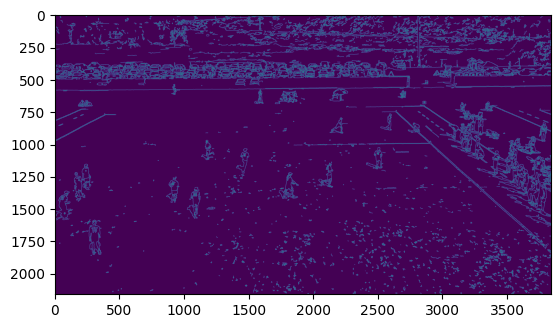

In [3]:
import matplotlib.pyplot as plt

root = "../data/processed/ultimate_detect/images/train"
file_path = os.path.join(root, "machine_vs_condors_pool_006_1066.jpg")
img_edges = detect_edges(file_path)
plt.imshow(img_edges)
#cv2.imwrite("machine_vs_condors_pool_006_1066_edges.jpg", img_edges)

In [4]:
import numpy as np

def polar_to_cartesian(rho, theta):
    # Convert polar coordinates to Cartesian coordinates
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    return x0, y0
    # x1 = int(x0 + 1000 * (-b))
    # y1 = int(y0 + 1000 * (a))
    # x2 = int(x0 - 1000 * (-b))
    # y2 = int(y0 - 1000 * (a))

Found 35 lines


True

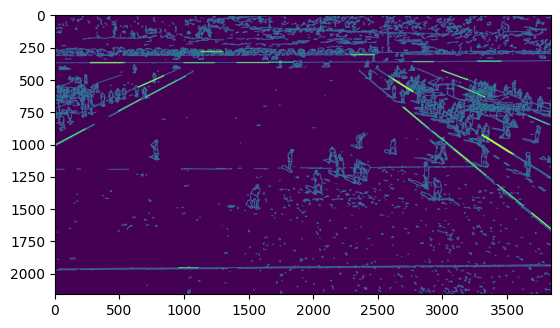

In [56]:
import numpy as np

def detect_lines_hough(image):
    #TODO - make a copy
    lines = cv2.HoughLines(image, rho=1.5, theta=np.pi / 180, threshold=200)
    # for line in lines:
    # rho, theta = line[0]
    # Iterate through each detected line
    print(f"Found {len(lines)} lines")
    for line in lines:
        print(line[0])
        print(line.shape)
        rho, theta = line[0]
        # Convert polar coordinates to Cartesian coordinates
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw lines on the original image
        #cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    return image

def detect_lines_hough_p(image):
    lines = cv2.HoughLinesP(image, rho=1.5, theta=(np.pi) / 180, threshold=200, minLineLength=150, maxLineGap=5)
    # Iterate through each detected line
    if lines is None:
        print("Nothing found")
        return image
    print(f"Found {len(lines)} lines")
    processed_image = image.copy()
    for line in lines:
        # print(line[0])
        # print(line.shape)
        x1, y1, x2, y2 = line[0]

        # Draw lines on the original image
        processed_image = cv2.line(processed_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

    return processed_image

img_edges = detect_edges(file_path)
img_howgh = detect_lines_hough_p(img_edges)
plt.imshow(img_howgh)

backtocolor = cv2.cvtColor(img_howgh, cv2.COLOR_GRAY2RGB)

cv2.imwrite("howgh.jpg", backtocolor)

In [55]:
# # Detect edges in a folder and save them in 'output_dir'
# print(os.getcwd())
# output_dir = "edges"
# for root, dirs, files in sorted(os.walk("../data/processed/ultimate_keypoints/images")):
#     for f in files:
#         file_path = os.path.join(root, f)
#         print(f"Processing {file_path}")
#         edge_img = detect_edges(file_path)
#         img_howgh = detect_lines_hough_p(edge_img)
#         #backtocolor = cv2.cvtColor(img_howgh, cv2.COLOR_GRAY2RGB)

#         cv2.imwrite(os.path.join(output_dir, f), img_howgh)